<a href="https://colab.research.google.com/github/kingdraw69/class-ciencia-de-datos/blob/main/Censo_Poblacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importe librerias y cargue de archivo

In [32]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

In [33]:
import numpy as np
import pandas as pd
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt


Util para leer este tipo de archivos

In [34]:
!pip install openpyxl

In [35]:
df = pd.read_excel("CENSO POBLACIONAL AGOSTO CIENCIA DE DATOS.xlsx", engine="openpyxl")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12987 entries, 0 to 12986
Columns: 255 entries, cod_dpto to Clasificacion
dtypes: datetime64[ns](1), float64(7), int64(210), object(37)
memory usage: 25.3+ MB


El df cuenta con 12.987 registros.
Cuenta con 255 columnas. Desde codigo departamento hasta Clasificacion.
Fecha y hora: Una columna.
Float: 7 Columnas.
Int64: 210 Columnas
Object: 37 columnas

In [36]:
df.head()

,cod_dpto,Departamento,cod_mpio,Municipio,fec_paquete,num_paquete,num_ficha,ide_ficha_origen,ide_edificacion,ver_estructura,...,ide_Ug,persug,Capital,marca,estado,Linea_p,replicacion,fec_actualizacion_cns,C,Clasificacion
0,68,SANTANDER,68418,LOS SANTOS,2023-05-03 17:09:24.893,1687,128326,6.841800e+19,0,50118082017,...,6.841868e+26,3,0,0,0,10781693454,0,2023-11-27 10:33:13.363,4.35,A02
1,68,SANTANDER,68418,LOS SANTOS,2023-05-03 17:09:24.893,1687,128326,6.841800e+19,0,50118082017,...,6.841868e+26,5,0,0,0,10781693454,0,2023-11-27 10:33:13.363,4.95,C02
2,68,SANTANDER,68418,LOS SANTOS,2023-05-03 17:09:24.893,1687,128326,6.841800e+19,0,50118082017,...,6.841868e+26,5,0,0,0,10781693454,0,2023-11-27 10:33:13.363,4.95,C02
3,68,SANTANDER,68418,LOS SANTOS,2023-05-03 17:09:24.893,1687,128326,6.841800e+19,0,50118082017,...,6.841868e+26,5,0,0,0,10781693454,0,2023-11-27 10:33:13.363,4.95,C02
4,68,SANTANDER,68418,LOS SANTOS,2023-05-03 17:09:24.893,1687,128326,6.841800e+19,0,50118082017,...,6.841868e+26,5,0,0,0,10781693454,0,2023-11-27 10:33:13.363,4.95,C02


#Limpieza de datos

Listamos todas las columnas, queremos saber que nos muestra el dataset en completo para asociarnos al tema

In [37]:
df.columns.to_list()

['cod_dpto',
 'Departamento',
 'cod_mpio',
 'Municipio',
 'fec_paquete',
 'num_paquete',
 'num_ficha',
 'ide_ficha_origen',
 'ide_edificacion',
 'ver_estructura',
 'ori_encuesta',
 'Cod_clase',
 'Cod_centro_poblado',
 'Cod_area_coordinacion',
 'Cod_area_operativa',
 'Cod_uni_cobertura',
 'Cod_comuna',
 'Cod_corregimiento',
 'NOM_CORREGIMIENTO',
 'Cod_vereda',
 'NOM_VEREDA',
 'Cod_barrio',
 'NOM_BARRIO',
 'Cod_enumerador',
 'tot_viviendas',
 'tot_hogares',
 'ord_vivienda',
 'ind_direccion',
 'Dir_vivienda',
 'uso_vivienda',
 'Ide_foto',
 'fec_ini_encuesta',
 'fec_fin_encuesta',
 'Coord_x_manual_rec',
 'Coord_y_manual_rec',
 'Coord_x_auto_rec',
 'Coord_y_auto_rec',
 'Gps_Alt_auto_rec',
 'Fec_captura_gps_rec',
 'Gps_Distancia_rec',
 'Coord_x_manual_enc',
 'Coord_y_manual_enc',
 'Coord_x_auto_enc',
 'Coord_y_auto_enc',
 'Gps_Alt_auto_enc',
 'Fec_captura_gps_enc',
 'Gps_Distancia_enc',
 'Est_nov_cartografia',
 'Cod_digitador',
 'Fec_digitacion',
 'ind_formato',
 'Num_hogares_recuento',
 'es

Importamos un dataset como anexo que muestra las columnas y el significado de cada una.

In [ ]:
uploaded = files.upload()

In [38]:
dfcl = pd.read_excel("variabless.xlsx", engine="openpyxl")
dfcl.head(20)

,Variable,Descripción
0,cod_dpto,Código del departamento según DIVIPOLA - DANE.
1,Departamento,Nombre del departamento.
2,cod_mpio,Código del municipio según DIVIPOLA - DANE.
3,Municipio,Nombre del municipio.
4,fec_paquete,Fecha en que se consolidó o generó el paquete ...
5,num_paquete,Número asignado al paquete de información del ...
6,num_ficha,Número de ficha de la encuesta aplicada.
7,ide_ficha_origen,Identificador único de la ficha en el sistema ...
8,ide_edificacion,Identificador único de la edificación dentro d...
9,ver_estructura,Versión de la estructura de recolección usada.


Analizamos que valores hay en las columnas, asi podemos identificar los valores unicos y saber que va a ser esencial de mantener en el dataset

In [39]:
df["Departamento"].value_counts()

,count
Departamento,
SANTANDER,12987


In [40]:
# Encontrar columnas con un solo valor único
columnas_constantes = [col for col in df.columns if df[col].nunique(dropna=False) == 1]

# Mostrar resultados
for col in columnas_constantes:
    print(f"{col}: {df[col].unique()[0]}")

cod_dpto: 68
Departamento: SANTANDER
cod_mpio: 68418
Municipio: LOS SANTOS
ori_encuesta: 1
Cod_comuna: 99
tot_viviendas: 0
uso_vivienda: 1
est_ficha: 1
Cod_Chip: nan
Dir_Chip: nan
cod_critico: 9999
Ind_declaracion: 1
ind_pariente_domestico: 2
ide_serv_domestico: 99
vlr_ingr_remesa_exterior: 0
ide_Unigasto: 1
Capital: 0


Podemos notar que features como
(cod_dpto: 68,
Departamento: SANTANDER,
cod_mpio: 68418,
Municipio: LOS SANTOS,
Cod_comuna: 99)
No van a cambiar y por ende no son cruciales para nuestro dataset.

Features como (Cod_Chip: nan, Dir_Chip: nan) aparecen nulos por ende tambien van a ser eliminados.

Tambien (Cod_comuna: 99, cod_critico: 9999, ide_serv_domestico: 99) Son valores que se usan para rellenar el formulario y por ello tampoco nos van a ser utiles.


In [41]:
df[["uso_vivienda","tot_viviendas"]].value_counts()

,,count
uso_vivienda,tot_viviendas,
1,0,12987


Uso de vivienda nos quiere decir que tiene uso habitacional. Por ello en todas las encuestas el valor es 1. Por otra parte Total viviendas nos puede decir varias cosas, segun la informacion investigada nuestra conclusion es que la respuesta es 0 debido a que hay algo que no cumple ninguna de las viviendas, y no por un error. Debemos averiguar que es

In [42]:
df["ori_encuesta"].value_counts()

,count
ori_encuesta,
1,12987


Al ver que todos los ori_encuesta es (1) podemos deducir que todas las encuestas se hicieron en persona. Por ende no es relevante ya que el dato es el mismo.

In [43]:
columnas_interes = [
    "ori_encuesta","Cod_comuna","tot_viviendas","uso_vivienda","est_ficha","Ind_declaracion","ind_pariente_domestico","ide_serv_domestico","vlr_ingr_remesa_exterior","ide_Unigasto","Capital"]
df_corr = df[columnas_interes]
df_corr.head()



,ori_encuesta,Cod_comuna,tot_viviendas,uso_vivienda,est_ficha,Ind_declaracion,ind_pariente_domestico,ide_serv_domestico,vlr_ingr_remesa_exterior,ide_Unigasto,Capital
0,1,99,0,1,1,1,2,99,0,1,0
1,1,99,0,1,1,1,2,99,0,1,0
2,1,99,0,1,1,1,2,99,0,1,0
3,1,99,0,1,1,1,2,99,0,1,0
4,1,99,0,1,1,1,2,99,0,1,0


In [44]:
print(df[columnas_interes].dtypes)

ori_encuesta                int64
Cod_comuna                  int64
tot_viviendas               int64
uso_vivienda                int64
est_ficha                   int64
Ind_declaracion             int64
ind_pariente_domestico      int64
ide_serv_domestico          int64
vlr_ingr_remesa_exterior    int64
ide_Unigasto                int64
Capital                     int64
dtype: object


/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


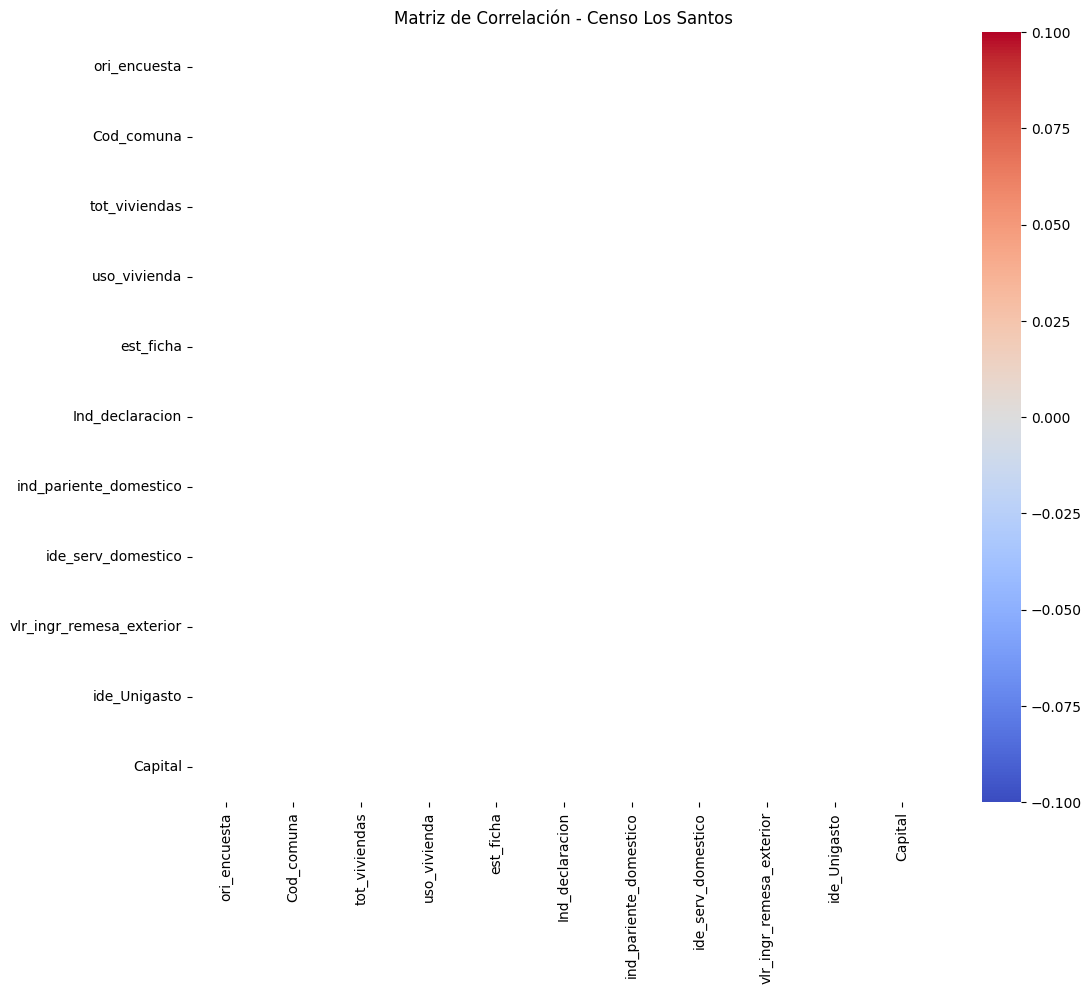

In [45]:
matriz_corr = df_corr.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación - Censo Los Santos")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


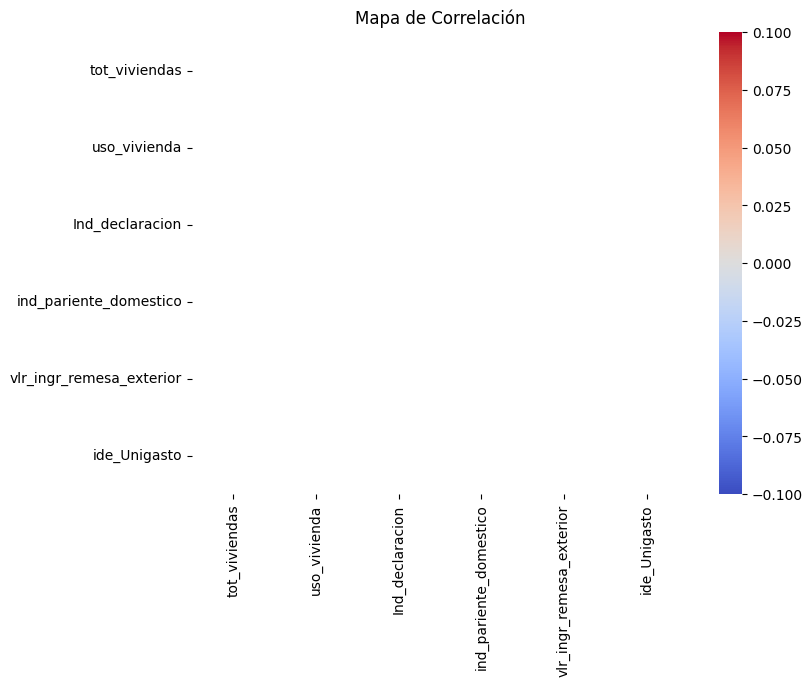

In [59]:
# 1. Copiar el DataFrame
df_corr = df.copy()

# 3. Seleccionar solo las columnas relevantes
df_corr = df_corr[columnas]

# 4. Calcular la matriz de correlación
correlation_matrix = df_corr.corr()

# 5. Dibujar un heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Correlación')
plt.show()

In [46]:
df.drop(columns=['cod_dpto',
                 'Departamento',
                 'cod_mpio',
                 'Municipio'],
         axis=1, inplace=True)

In [47]:
df.drop(columns=['Cod_comuna',
                 'cod_critico',
                 'ide_serv_domestico'],
         axis=1, inplace=True)

In [48]:
df.drop(columns=['Cod_Chip',
                 'Dir_Chip',],
         axis=1, inplace=True)

In [49]:
df.head()

,fec_paquete,num_paquete,num_ficha,ide_ficha_origen,ide_edificacion,ver_estructura,ori_encuesta,Cod_clase,Cod_centro_poblado,Cod_area_coordinacion,...,ide_Ug,persug,Capital,marca,estado,Linea_p,replicacion,fec_actualizacion_cns,C,Clasificacion
0,2023-05-03 17:09:24.893,1687,128326,6.841800e+19,0,50118082017,1,3,0,1,...,6.841868e+26,3,0,0,0,10781693454,0,2023-11-27 10:33:13.363,4.35,A02
1,2023-05-03 17:09:24.893,1687,128326,6.841800e+19,0,50118082017,1,3,0,1,...,6.841868e+26,5,0,0,0,10781693454,0,2023-11-27 10:33:13.363,4.95,C02
2,2023-05-03 17:09:24.893,1687,128326,6.841800e+19,0,50118082017,1,3,0,1,...,6.841868e+26,5,0,0,0,10781693454,0,2023-11-27 10:33:13.363,4.95,C02
3,2023-05-03 17:09:24.893,1687,128326,6.841800e+19,0,50118082017,1,3,0,1,...,6.841868e+26,5,0,0,0,10781693454,0,2023-11-27 10:33:13.363,4.95,C02
4,2023-05-03 17:09:24.893,1687,128326,6.841800e+19,0,50118082017,1,3,0,1,...,6.841868e+26,5,0,0,0,10781693454,0,2023-11-27 10:33:13.363,4.95,C02


In [50]:
nulos = df.isnull()
print(nulos)

       fec_paquete  num_paquete  num_ficha  ide_ficha_origen  ide_edificacion  \
0            False        False      False             False            False   
1            False        False      False             False            False   
2            False        False      False             False            False   
3            False        False      False             False            False   
4            False        False      False             False            False   
...            ...          ...        ...               ...              ...   
12982        False        False      False             False            False   
12983        False        False      False             False            False   
12984        False        False      False             False            False   
12985        False        False      False             False            False   
12986        False        False      False             False            False   

       ver_estructura  ori_

In [51]:
print(df.isnull().sum())

fec_paquete                0
num_paquete                0
num_ficha                  0
ide_ficha_origen           0
ide_edificacion            0
                        ... 
Linea_p                    0
replicacion                0
fec_actualizacion_cns    599
C                          0
Clasificacion              0
Length: 246, dtype: int64


In [52]:
!pip install missingno #Instalacion Top

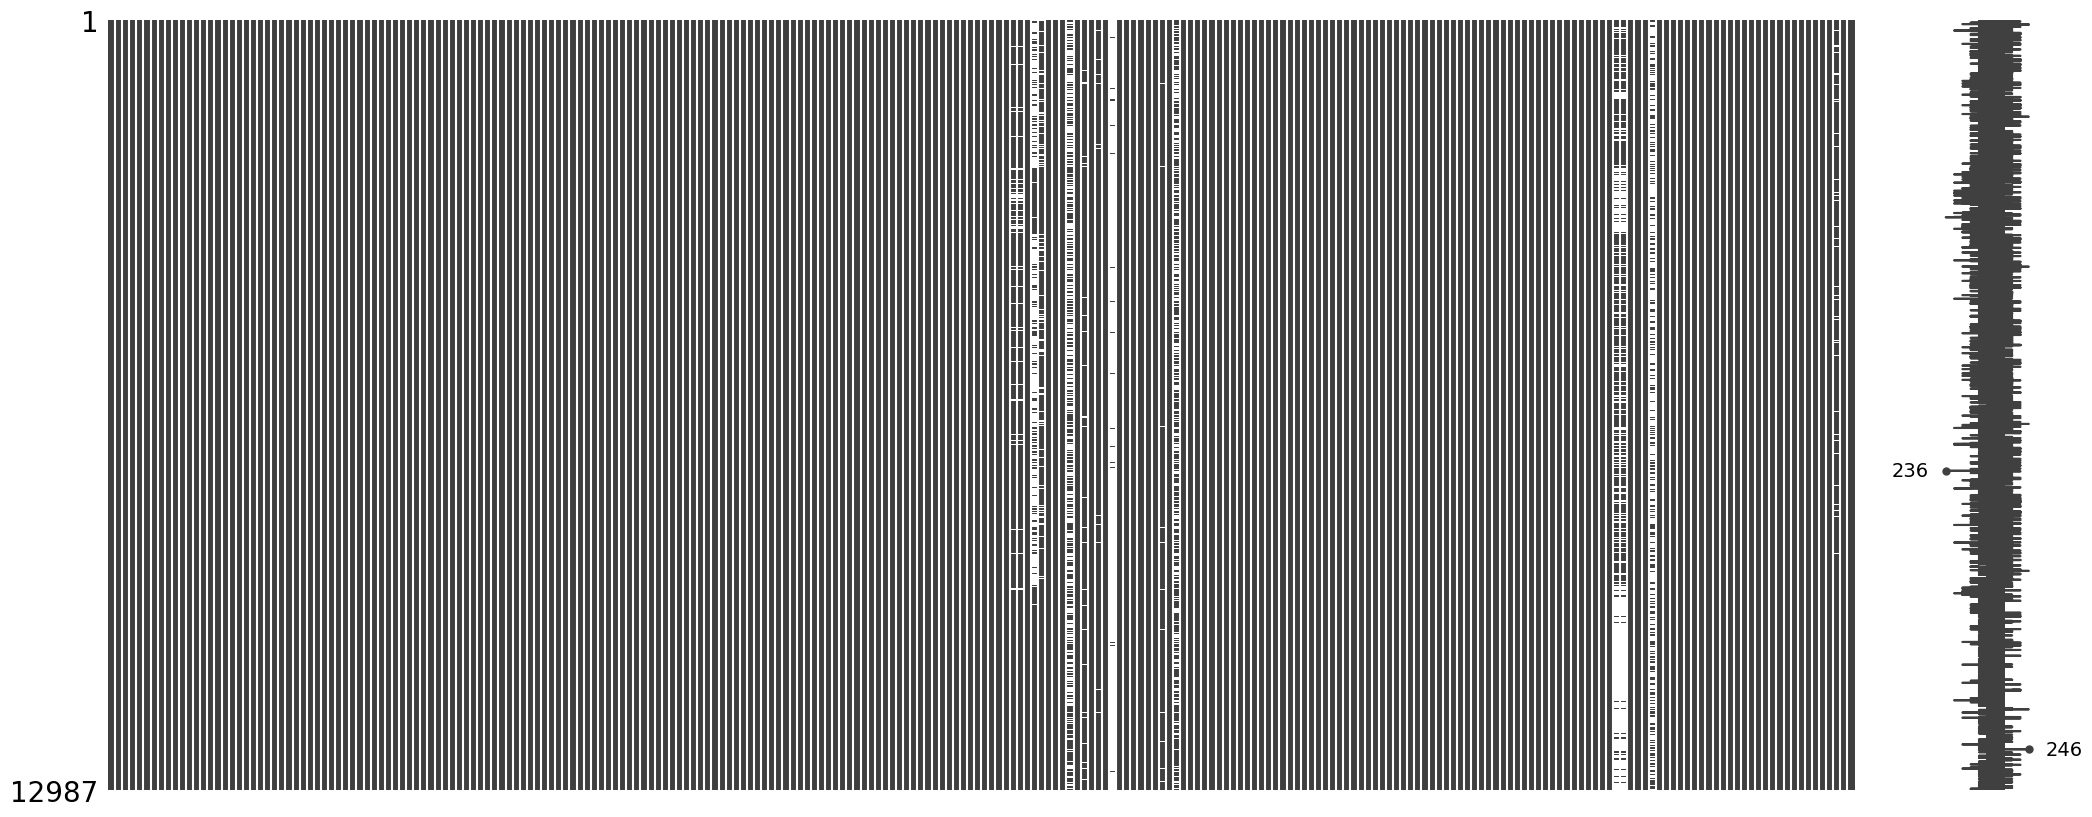

In [53]:
import missingno as msno
msno.matrix(df)
plt.show()

Miramos que columnas tienen un porcentajo alto de columnas con valores nulos

In [54]:
umbral = 0.6  # porcentaje de Umbral
columnas_con_nulos = df.columns[df.isna().mean() > umbral]
print(columnas_con_nulos)

Index(['Email_contacto', 'Jefe_UG'], dtype='object')


In [56]:
correos_filtrados = df[df["Email_contacto"] == "josemanuenla@gmail.com"]

In [57]:
correos_filtrados.head()

,fec_paquete,num_paquete,num_ficha,ide_ficha_origen,ide_edificacion,ver_estructura,ori_encuesta,Cod_clase,Cod_centro_poblado,Cod_area_coordinacion,...,ide_Ug,persug,Capital,marca,estado,Linea_p,replicacion,fec_actualizacion_cns,C,Clasificacion
4159,2022-06-29 03:34:07.210,1478,58927,6.841800e+19,1,18082017,1,3,0,2,...,6.841868e+26,3,0,0,0,10781693454,0,2023-11-27 10:33:13.363,5.70,B07
4160,2022-06-29 03:34:07.210,1478,58927,6.841800e+19,1,18082017,1,3,0,2,...,6.841868e+26,3,0,10,91,10781693454,0,2023-11-27 04:05:07.090,5.70,B07
4161,2022-06-29 03:34:07.210,1478,58927,6.841800e+19,1,18082017,1,3,0,2,...,6.841868e+26,4,0,0,0,10781693454,0,2023-11-27 10:33:13.363,5.55,A05
4162,2022-06-29 03:34:07.210,1478,58927,6.841800e+19,1,18082017,1,3,0,2,...,6.841868e+26,4,0,0,0,10781693454,0,2023-11-27 10:33:13.363,5.55,A05
4163,2022-06-29 03:34:07.210,1478,58927,6.841800e+19,1,18082017,1,3,0,2,...,6.841868e+26,4,0,0,0,10781693454,0,2023-11-27 10:33:13.363,5.55,A05


#Análisis de datos

In [58]:
columnas = ["tot_viviendas","uso_vivienda","Ind_declaracion","ind_pariente_domestico","vlr_ingr_remesa_exterior","ide_Unigasto"]
print(df[columnas].dtypes)

tot_viviendas               int64
uso_vivienda                int64
Ind_declaracion             int64
ind_pariente_domestico      int64
vlr_ingr_remesa_exterior    int64
ide_Unigasto                int64
dtype: object


In [60]:
cl= ['#E3BAFF', #lila pastel
     '#FFB3BA',  # rosa suave
                 '#FFFFBA',  # amarillo pastel
                 '#BAFFC9',  # verde menta
                 '#BAE1FF',  # celeste claro
                 '#FFC1CC',  #Rosa Pastel
                "#AEC6CF", #Azul Pastel
                "#FFEDA0", #Amarillo Pastel
                 "#D0F0C0", #Verde Pistacho
                 ]

##Características personas segmento

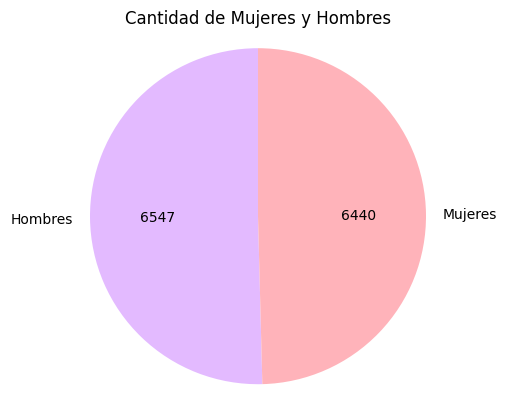

In [94]:
labels = ['Hombres', 'Mujeres']
valores = df['sexo_persona'].value_counts().values
def mostrar_cantidad(val):
    total = sum(valores)
    cantidad = int(round(val/100 * total))
    return f'{cantidad}'
plt.pie(valores, labels=labels, autopct=mostrar_cantidad, startangle=90)
plt.title('Cantidad de Mujeres y Hombres')
plt.axis('equal')
plt.show()

Se observa que la mayoría de los encuestados son hombres

<ipython-input-95-0c63b786c29c>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['sexo_persona', 'grupo_edad']).size().unstack()


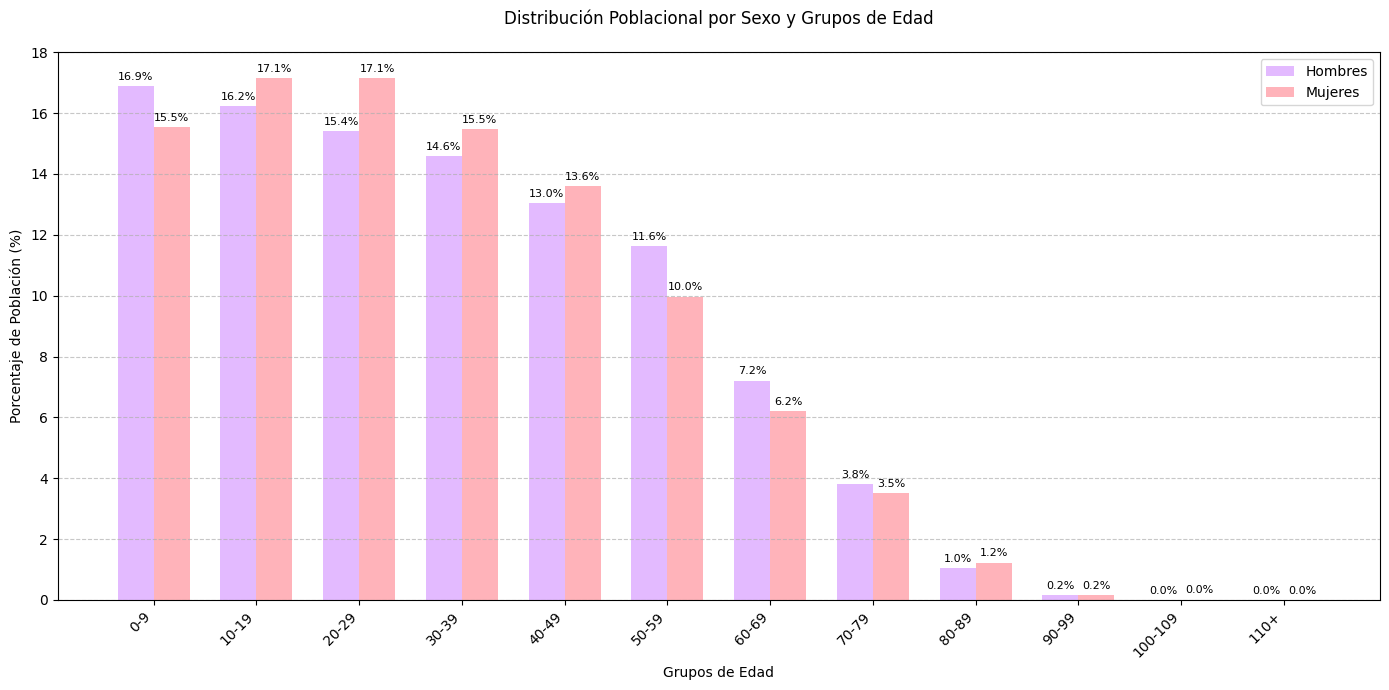

In [95]:
# Crear rangos de edad cada 10 años
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109', '110+']

# Crear grupos de edad
df['grupo_edad'] = pd.cut(df['edad_calculada'], bins=bins, labels=labels, right=False)

# Agrupar por sexo y grupo de edad
grouped = df.groupby(['sexo_persona', 'grupo_edad']).size().unstack()

# Convertir a porcentajes para mejor comparación
grouped_pct = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Configurar el gráfico
plt.figure(figsize=(14, 7))

# Configuración de posición de barras
x = np.arange(len(labels))  # ubicaciones de las etiquetas
width = 0.35  # ancho de las barras

# Crear barras para hombres
bars1 = plt.bar(x - width/2, grouped_pct.loc[1], width, label='Hombres')

# Crear barras para mujeres
bars2 = plt.bar(x + width/2, grouped_pct.loc[2], width, label='Mujeres')

# Personalizar gráfico
sns.set_palette(cl)
plt.xlabel('Grupos de Edad')
plt.ylabel('Porcentaje de Población (%)')
plt.title('Distribución Poblacional por Sexo y Grupos de Edad', pad=20)
plt.xticks(x, labels, rotation=45, ha='right')
plt.legend()

# Añadir etiquetas de valor
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

add_labels(bars1)
add_labels(bars2)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

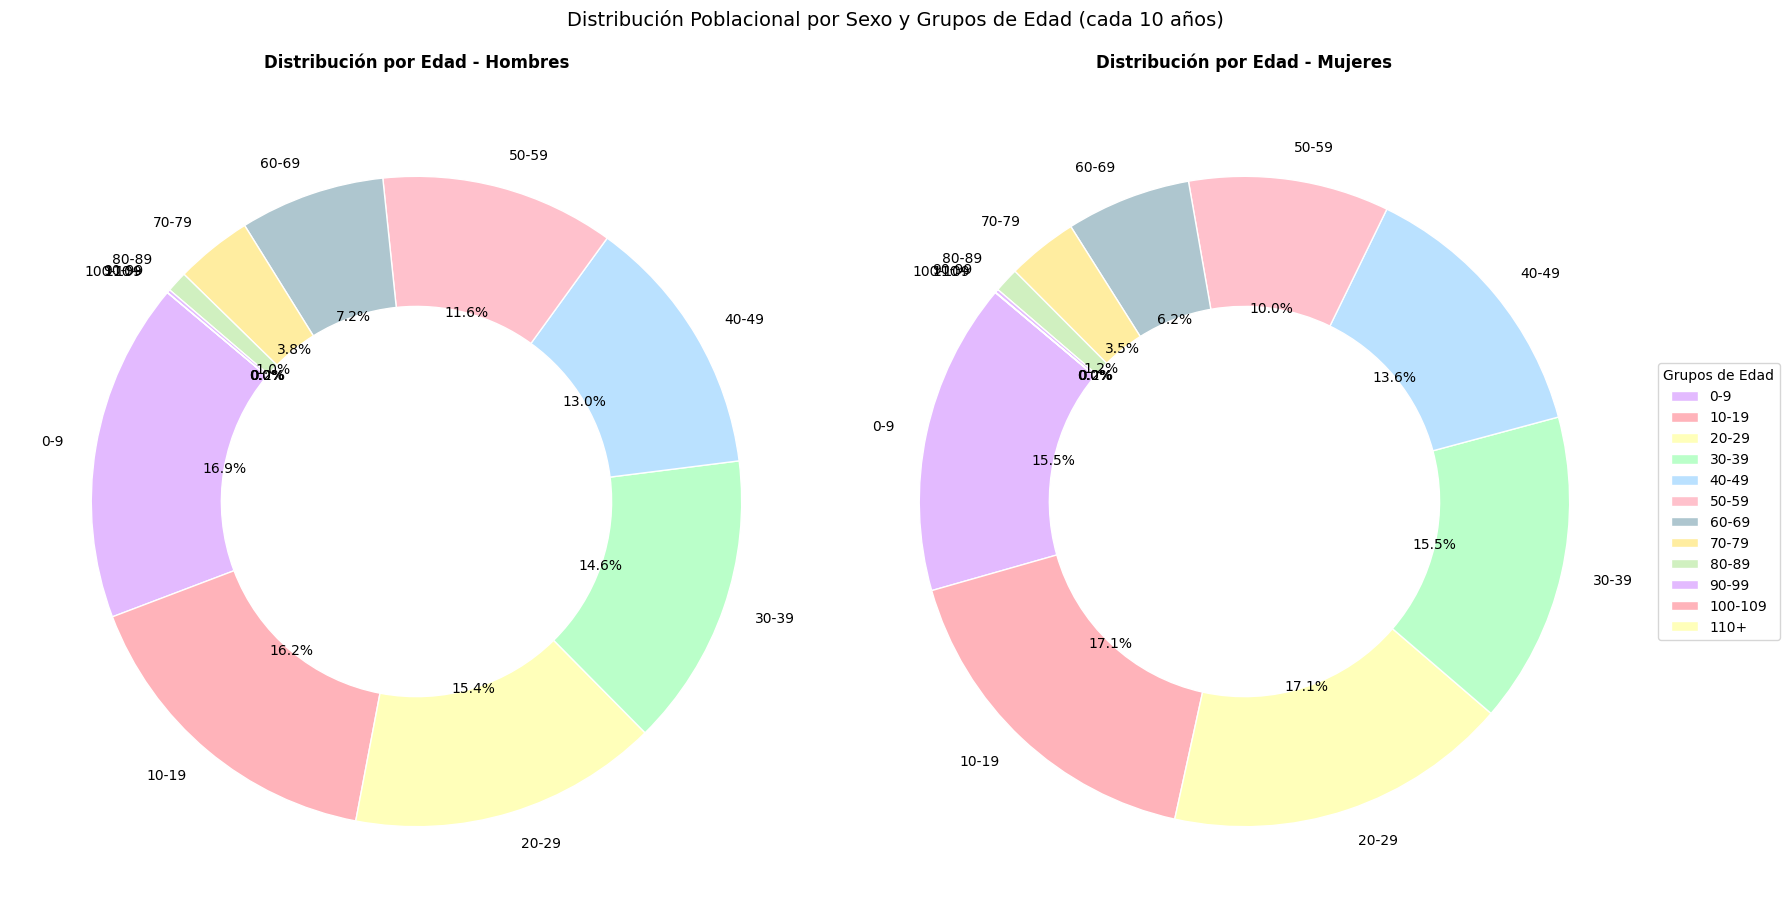

In [105]:
# Versión mejorada con más personalización
colors = sns.set_palette(cl)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))

# Hombres
wedges, texts, autotexts = ax1.pie(grouped.loc[1],
                                  labels=labels,
                                  autopct='%1.1f%%',
                                  startangle=140,
                                  colors=colors,
                                  wedgeprops=dict(width=0.4, edgecolor='w'))
ax1.set_title('Distribución por Edad - Hombres', pad=20, fontweight='bold')

# Mujeres
wedges, texts, autotexts = ax2.pie(grouped.loc[2],
                                  labels=labels,
                                  autopct='%1.1f%%',
                                  startangle=140,
                                  colors=colors,
                                  wedgeprops=dict(width=0.4, edgecolor='w'))
ax2.set_title('Distribución por Edad - Mujeres', pad=20, fontweight='bold')

# Añadir leyenda general
plt.legend(labels, title="Grupos de Edad",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))

plt.suptitle('Distribución Poblacional por Sexo y Grupos de Edad (cada 10 años)', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

En evidente como los rangos de edades en los que se encuentra la mayor cantidad de personas es de 0 a 49 años

In [63]:
def sex(feature):
  a=df[df["sexo_persona"]==1][feature].value_counts()
  b=df[df["sexo_persona"]==2][feature].value_counts()
  test = pd.DataFrame({
        "Hombre": a,
        "Mujer": b,
         }).fillna(0)
  test = test.astype(int)
  ax = test.T.plot(kind="bar", stacked=True, figsize=(12, 6))
  sns.set_palette(cl)
  ax.set_ylabel("Frecuencia")
  ax.set_xlabel("Tipo de vivienda")
  ax.set_title(f"Distribución de '{feature}' por tipo de vivienda")
  plt.tight_layout()
  plt.show()

In [64]:
#ver valores que hay en la columna y la frecuencia que tienen
valores_unicos = df['num_hogares_vivienda'].unique()
conteo = df['num_hogares_vivienda'].value_counts()
print("Valores únicos en 'num_hogares_vivienda':")
print(valores_unicos,conteo)

Valores únicos en 'num_hogares_vivienda':
[2 1 4 3 5] num_hogares_vivienda
1    10137
2     2097
3      637
4       80
5       36
Name: count, dtype: int64


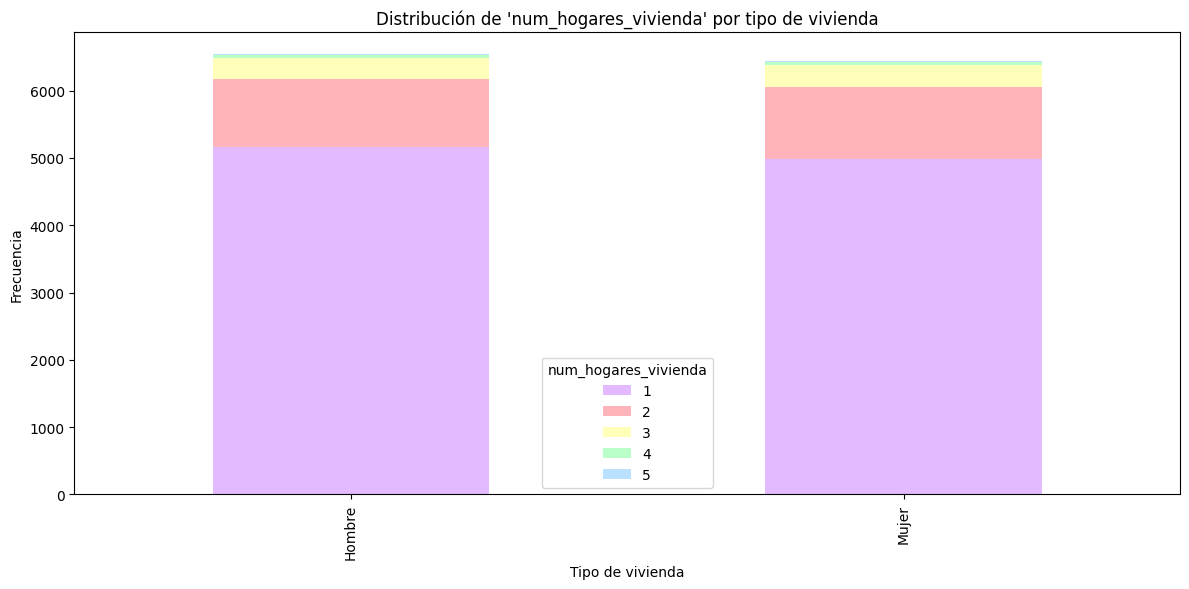

In [65]:
sex("num_hogares_vivienda")

En la mayoría de las viviendas hay solo un hogar, aunque en muchas otras también se pueden encontrar dos. Además no se notan diferencias muy significativas en cuanto al género.

##Uso de vivienda

In [68]:
def viv(feature):
  a=df[df["tip_vivienda"]==1][feature].value_counts()
  b=df[df["tip_vivienda"]==2][feature].value_counts()
  c=df[df["tip_vivienda"]==3][feature].value_counts()
  d=df[df["tip_vivienda"]==4][feature].value_counts()
  e=df[df["tip_vivienda"]==5][feature].value_counts()
  test = pd.DataFrame({
        "Casa": a,
        "Apartamento": b,
        "Inquilinato": c,
        "Otro tipo de vivienda": d,
        "Vivienda indígena": e
    }).fillna(0)
  test = test.astype(int)
  # Configurar la paleta de colores si 'cl' está definida globalmente
  ax = test.T.plot(kind="bar", stacked=True, figsize=(12, 6))
  sns.set_palette(cl)
  ax.set_ylabel("Frecuencia")
  ax.set_xlabel("Tipo de vivienda")
  ax.set_title(f"Distribución de '{feature}' por tipo de vivienda")
  plt.tight_layout()
  plt.show()

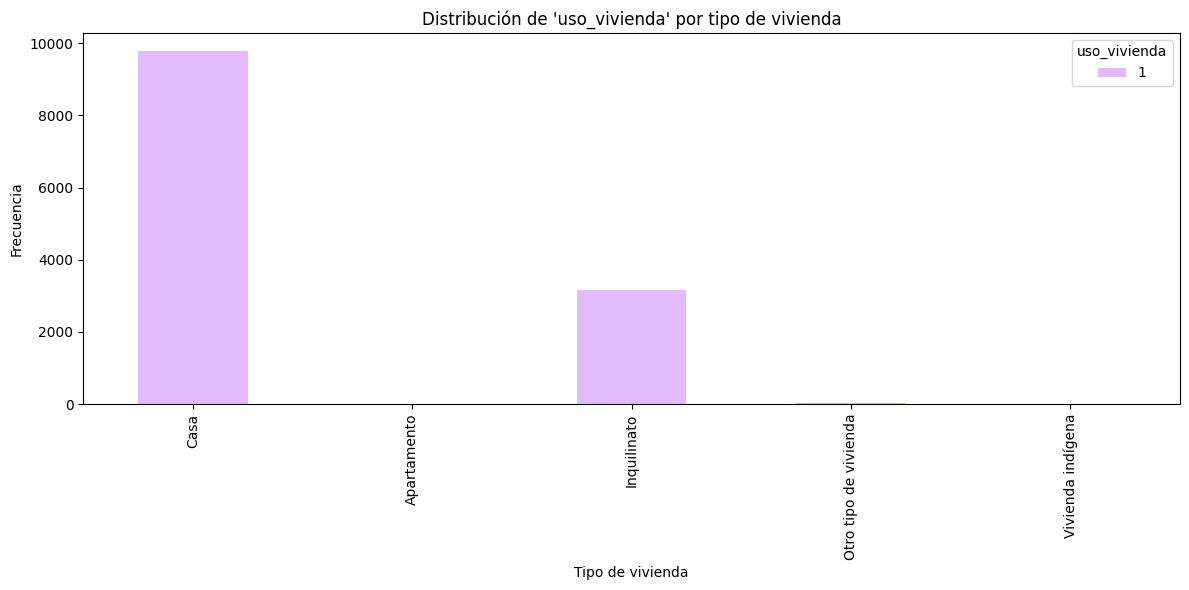

In [69]:
viv("uso_vivienda")

In [70]:
#ver valores que hay en la columna y la frecuencia que tienen
valores_unicos = df['tip_vivienda'].unique()
conteo = df['tip_vivienda'].value_counts()
print("Valores únicos en 'tip_vivienda':")
print(valores_unicos,conteo)

Valores únicos en 'tip_vivienda':
[1 3 4 2 5] tip_vivienda
1    9795
3    3157
4      20
2      13
5       2
Name: count, dtype: int64


In [71]:
#ver valores que hay en la columna y la frecuencia que tienen
valores_unicos = df['uso_vivienda'].unique()
conteo = df['uso_vivienda'].value_counts()
print("Valores únicos en 'uso_vivienda':")
print(valores_unicos,conteo)

Valores únicos en 'uso_vivienda':
[1] uso_vivienda
1    12987
Name: count, dtype: int64


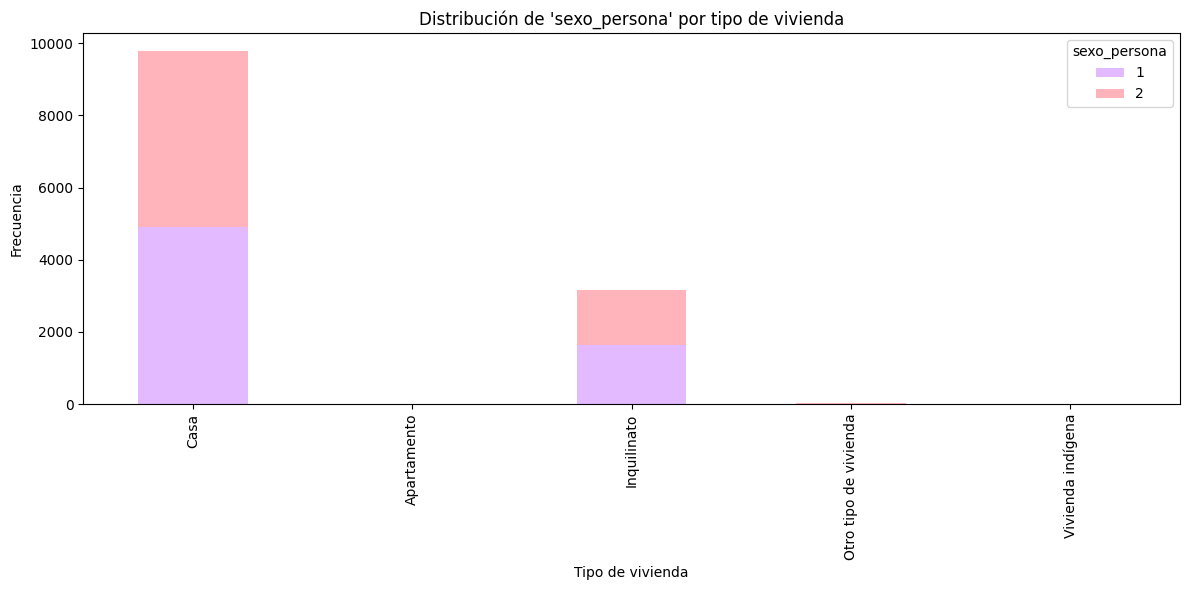

In [72]:
viv("sexo_persona")

Es evidente como hay una mayor cantidad de mujeres en casas, aunque la diferencia no es muy significativa, casi se podría decir que el género no es muy influyente en dicha variable

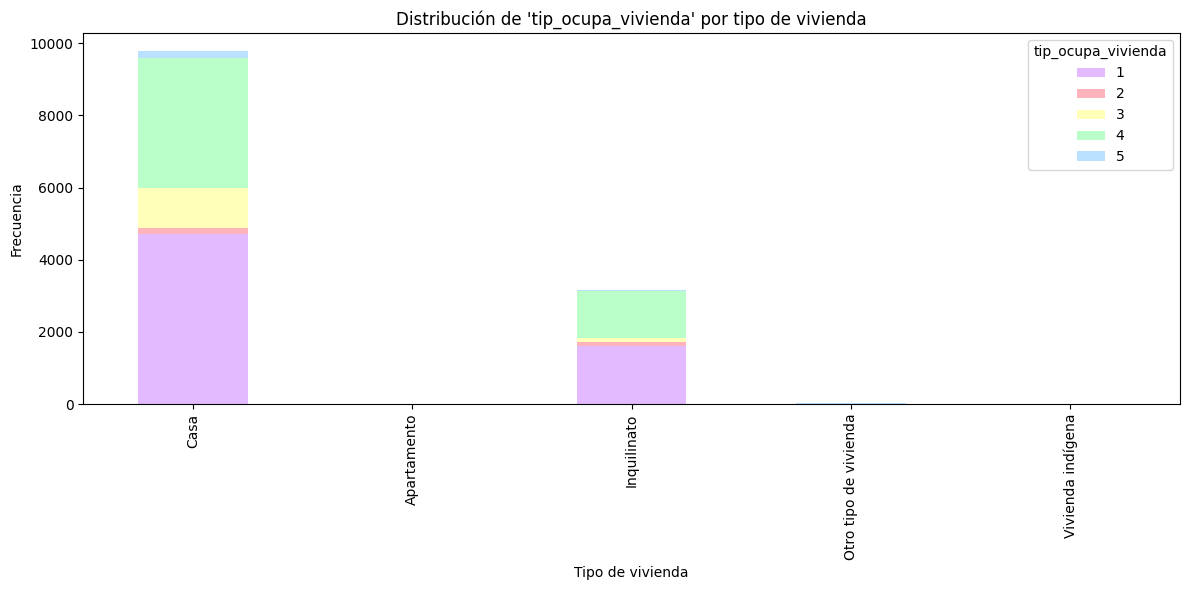

In [73]:
viv("tip_ocupa_vivienda")

Casi la mitad, en cada caso, se encuentra en una vivienda en la que paga arriendo. En menor cantidad, considerablemente, es una vivienda propia, ya sea que esté paga (en mucho más baja proporción), o que aun se esté pagando. Mientras tanto, el otro valor predominante luego del arriendo es que viven con permiso del propietario.

##Casas materiales

In [74]:
#ver valores que hay en la columna y la frecuencia que tienen
valores_unicos = df['tip_mat_paredes'].unique()
conteo = df['tip_mat_paredes'].value_counts()
print("Valores únicos en 'tip_mat_paredes:")
print(valores_unicos,conteo)

Valores únicos en 'tip_mat_paredes:
[1 2 3 5 7 4 6] tip_mat_paredes
1    8313
2    4028
3     324
7     107
5      92
6      79
4      44
Name: count, dtype: int64


Recordemos que:
1. Bloque, ladrillo, piedra, madera pulida
2. Tapia pisada, adobe
3. Bahareque
4. Material prefabricado
5. Madera burda, tabla, tablón
6. Guadua, casa, esterilla, otro vegetal
7. Zinc, tela, lona, cartón, latas, desechos, plástico
0. Sin paredes


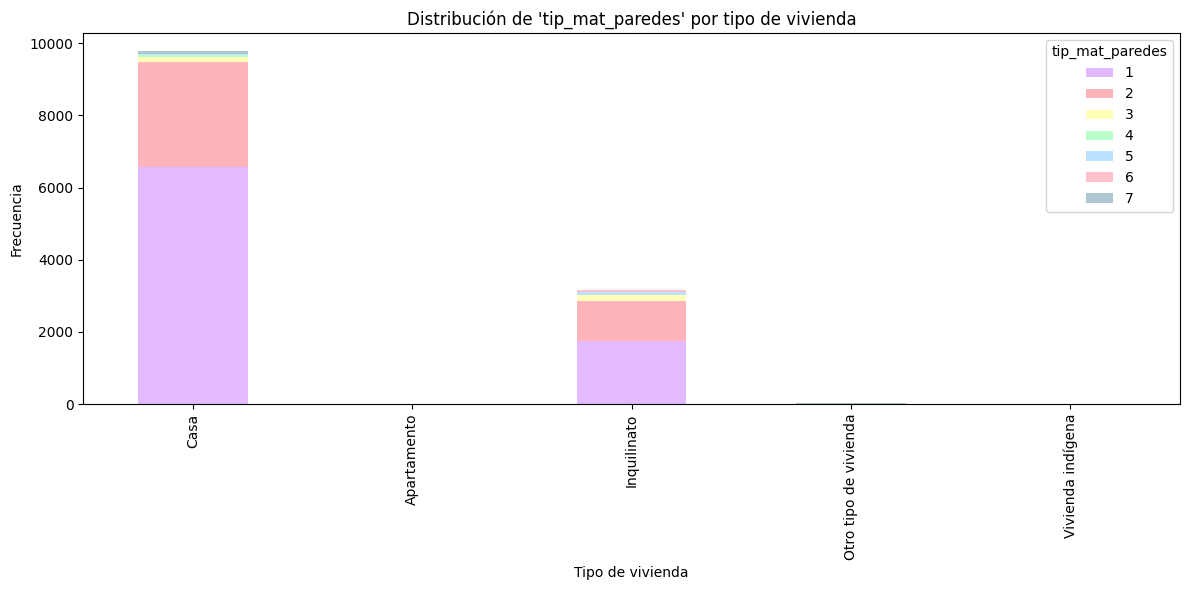

In [75]:
viv("tip_mat_paredes")

Por lo tanto se observa como la mayoría de las paredes está hecha con materiales de tipo 1 y 2

En el caso de los tipos de piso, tenemos que:
1. Alfombra o tapete, mármol, parque, madera pulida y lacada
2. Baldosa, vinilo, tableta, ladrillo
3. Cemento, gravilla
4. Madera burda, madera en mal estado, tabla, tablón
5. Tierra o arena
6. otro

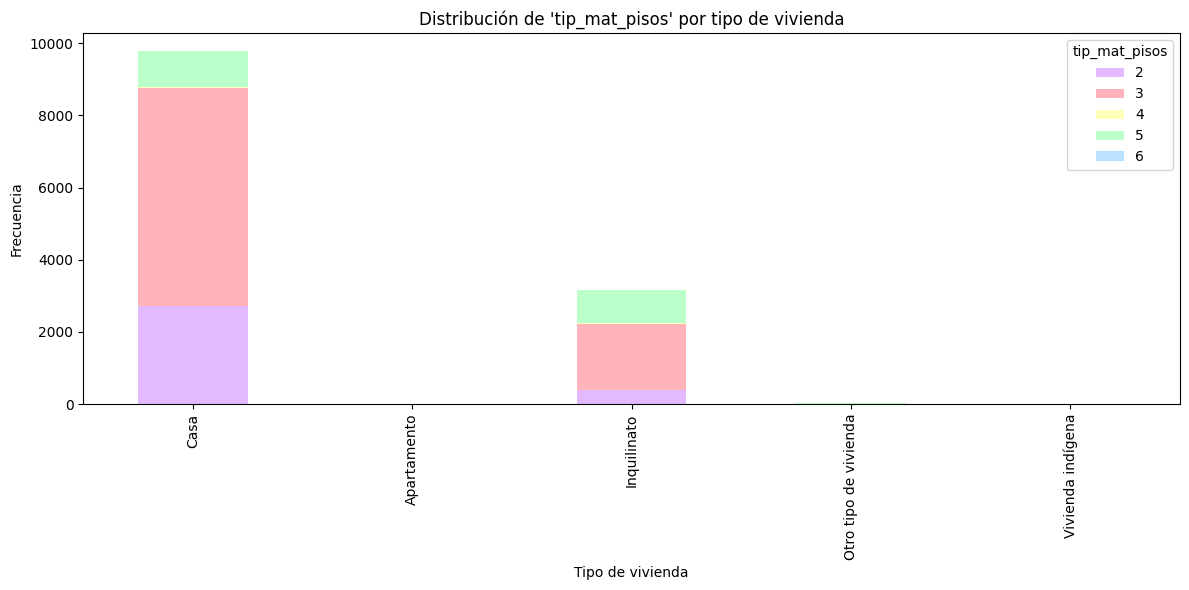

In [76]:
viv("tip_mat_pisos")

La mayoría de los pisos son de cemento o gravilla

Vamos a relacionar el tipo de piso y paredes para analizar el estado de las propiedades

In [77]:
def matcasa(feature):
  a=df[df["tip_mat_pisos"]==1][feature].value_counts()
  b=df[df["tip_mat_pisos"]==2][feature].value_counts()
  c=df[df["tip_mat_pisos"]==3][feature].value_counts()
  d=df[df["tip_mat_pisos"]==4][feature].value_counts()
  e=df[df["tip_mat_pisos"]==5][feature].value_counts()
  f=df[df["tip_mat_pisos"]==6][feature].value_counts()
  test = pd.DataFrame({
        "1": a,
        "2": b,
        "3": c,
        "4": d,
        "5": e,
        "6": f
    }).fillna(0)
  test = test.astype(int)
  # Configurar la paleta de colores si 'cl' está definida globalmente
  ax = test.T.plot(kind="bar", stacked=True, figsize=(12, 6))
  sns.set_palette(cl)
  ax.set_ylabel("Frecuencia")
  ax.set_xlabel("Material predominante de los pisos ")
  ax.set_title(f"Distribución de '{feature}' por material de pisos")
  plt.tight_layout()
  plt.show()

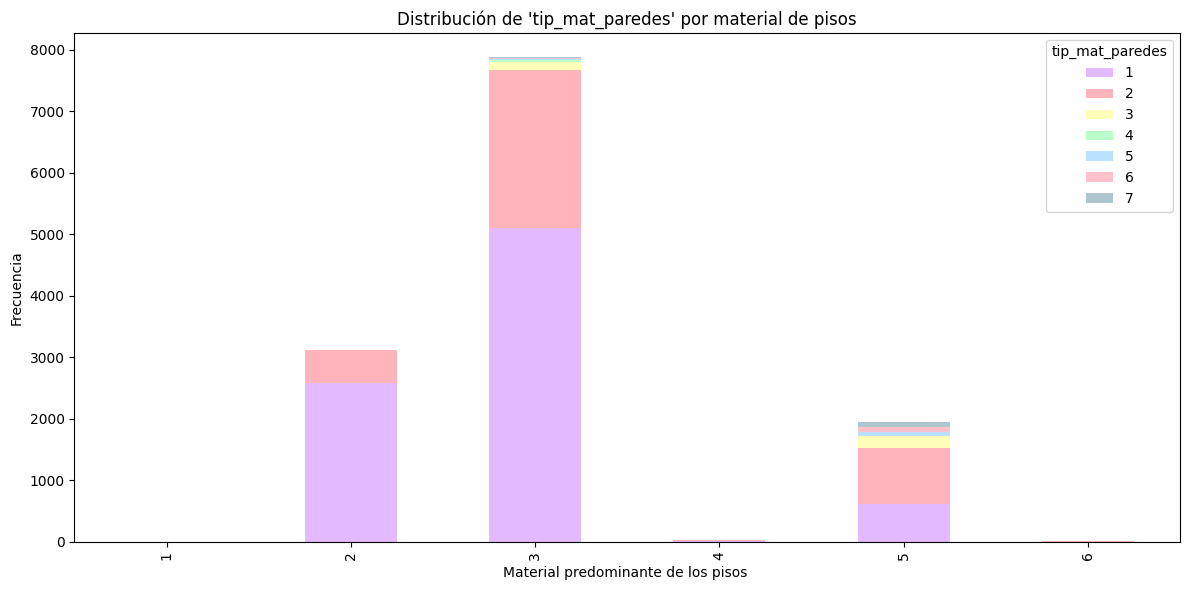

In [78]:
matcasa("tip_mat_paredes")

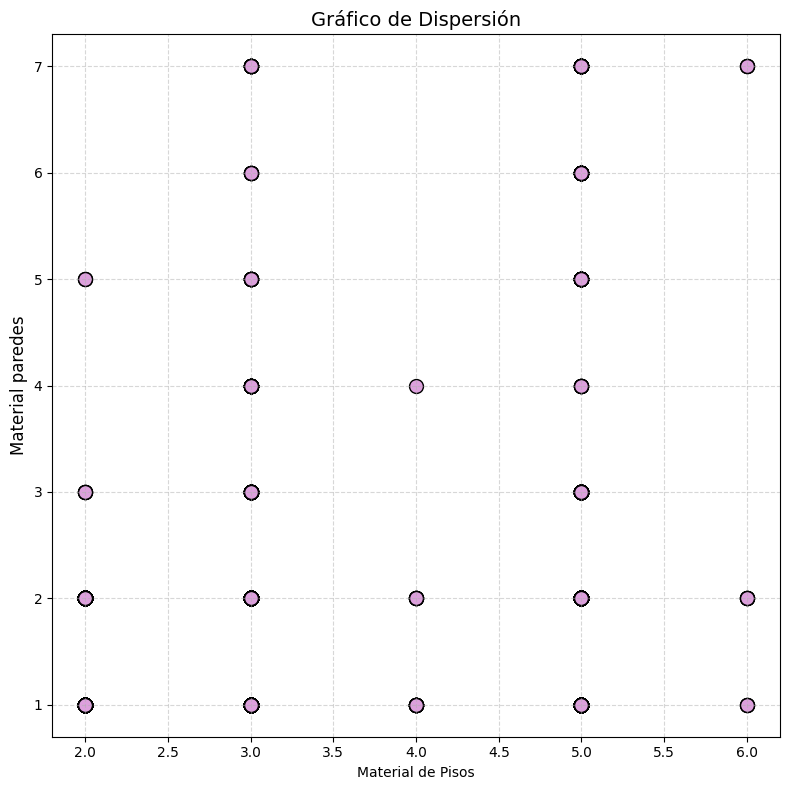

In [79]:
plt.figure(figsize=(8, 8))
plt.scatter(df['tip_mat_pisos'], df['tip_mat_paredes'], color='plum', edgecolor='black', s=100)

# Etiquetas y título
plt.xlabel('Material de Pisos')
plt.ylabel('Material paredes', fontsize=12)
plt.title('Gráfico de Dispersión', fontsize=14)

# Mostrar cuadrícula
plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar gráfico
plt.tight_layout()
plt.show()

Se encuentra que, la mayoría cuenta con casas con pisos de cemento o gravilla y por paredes material como alfombra o tapete, mármol, parque, madera pulida y lacada o en un poco menor medida, de tapia pisada o adobe

In [80]:
def H5(feature):
  a=df[df["H_5"]== 0][feature].value_counts()
  b=df[df["H_5"]== 1][feature].value_counts()
  test = pd.DataFrame({
        "No": a,
        "Si": b,
    }).fillna(0)
  test = test.astype(int)
  ax = test.T.plot(kind="bar", stacked=True, figsize=(12, 6))
  ax.set_ylabel("Frecuencia")
  ax.set_xlabel("Pobreza Multidimensional")
  ax.set_title(f"Distribución de '{feature}' por pobreza multidimensional")
  plt.tight_layout()
  plt.show()

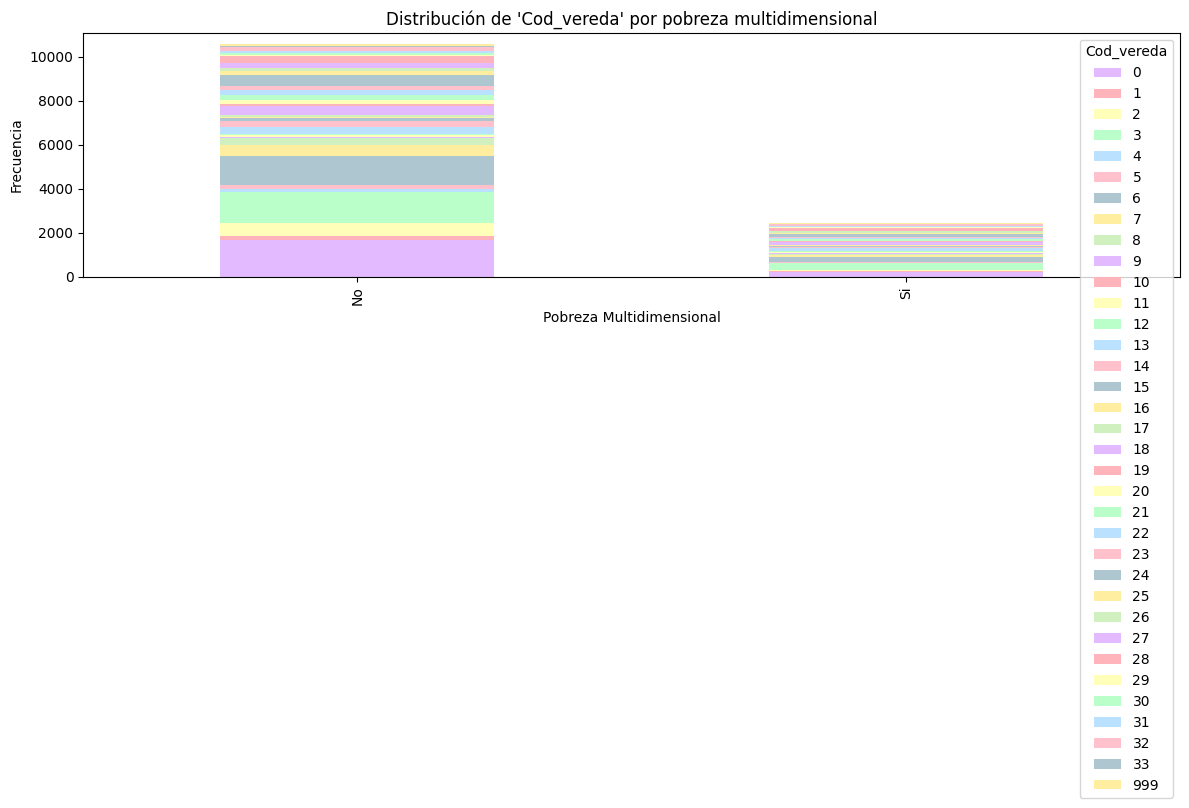

In [81]:
H5("Cod_vereda")

##Pobreza

In [ ]:
def wifi(feature):
  a=df[df["ind_tiene_internet"]==1][feature].value_counts()
  b=df[df["ind_tiene_internet"]==2][feature].value_counts()
  test = pd.DataFrame({
        "Con Wifi": a,
        "Sin Wifi": b,
         }).fillna(0)
  test = test.astype(int)
  ax = test.T.plot(kind="bar", stacked=True, figsize=(12, 6))
  sns.set_palette(cl)
  ax.set_ylabel("Frecuencia")
  ax.set_xlabel("Cuenta con internet")
  ax.set_title(f"Distribución de '{feature}' por dato de si cuenta con internet")
  plt.tight_layout()
  plt.show()

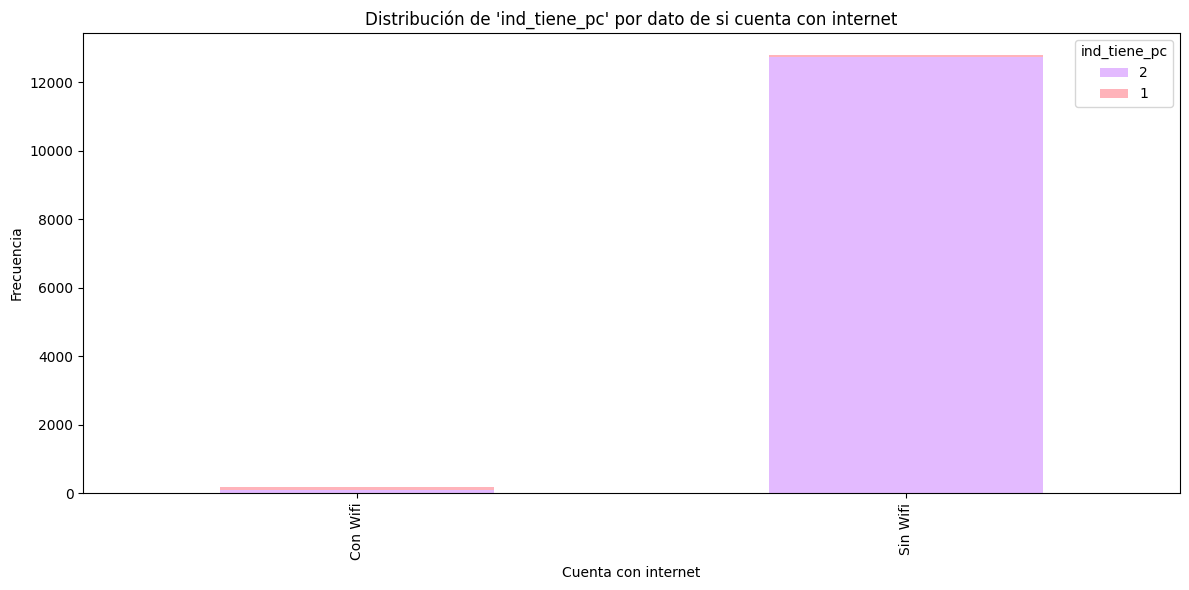

In [ ]:
wifi("ind_tiene_pc")

La gran mayoría no cuenta con servicio de internet, y quienes lo tienen no todos cuentan con computador, aproximadamente la mitad. Además, de quienes no cuentan con Wifi, hay una minoría que tiene computador.

In [82]:
# Ejemplo simple: vivienda sin agua, gas, electricidad, alcantarillado
df['indicador_pobreza'] = (
    (df['ind_tiene_energia'] == 2) |
    (df['ind_tiene_gas'] == 2) |
    (df['ind_tiene_acueducto'] == 2) |
    (df['ind_tiene_alcantarillado'] == 2)
).astype(int)
df['indicador_pobreza'].value_counts()

,count
indicador_pobreza,
1,12632
0,355


<ipython-input-83-a9df4de7d66c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='indicador_pobreza', palette='viridis')


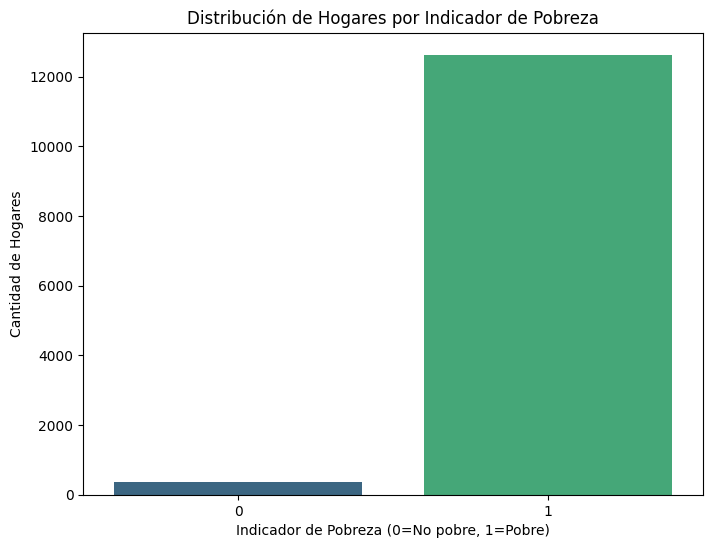

In [83]:
# Distribución del indicador de pobreza
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='indicador_pobreza', palette='viridis')
plt.title('Distribución de Hogares por Indicador de Pobreza')
plt.xlabel('Indicador de Pobreza (0=No pobre, 1=Pobre)')
plt.ylabel('Cantidad de Hogares')
plt.show()

La gran mayoría de la población se encuentra en estado de pobreza

In [84]:
pobreza_por_vereda = df.groupby('NOM_VEREDA')['indicador_pobreza'].mean().reset_index()
pobreza_por_vereda.columns = ['Vereda', 'Porcentaje_pobreza']
pobreza_por_vereda['Porcentaje_pobreza'] *= 100



In [85]:
valores_unicos = df['NOM_VEREDA'].unique()
conteo = df['NOM_VEREDA'].value_counts()
print("Valores únicos en 'NOM_VEREDA':")
print(valores_unicos,conteo)

Valores únicos en 'NOM_VEREDA':
['ROSABLANCA' 'SIN VEREDA' 'EL POZO' 'EL DIAMANTE' 'LAGUNA ALTA'
 'MAJADAL ALTO' 'GARBANZAL' 'EL GUAMITO' 'LA FUENTE' 'DELICIAS'
 'LAS LLANADAS' 'EL POTRERO' 'ESPINAL BAJO' 'REGADERO ALTO' 'LOS TERES'
 'LOMA DE PURNIA' 'LA PURNIA' 'PIEDRA DEL RAYO' 'LAGUNA BAJA' 'PASOCHICO'
 'LA LOMA' 'ESPINAL ALTO' 'REGADERO BAJO' 'MAJADAL BAJO' 'TABACAL'
 'SAN RAFAEL' 'EL CARRIZAL' 'EL VERDE' 'LA MOJARRA' 'PURNIA CHIQUITA'
 'SALAZAR' 'GUAIMARO' 'PURNIA NUEVA' 'LA PEÑA'] NOM_VEREDA
SIN VEREDA         1842
TABACAL            1681
LA FUENTE          1584
EL VERDE            681
ESPINAL ALTO        586
ROSABLANCA          536
LAGUNA BAJA         517
EL POZO             481
LA PURNIA           469
DELICIAS            392
GARBANZAL           302
EL GUAMITO          301
REGADERO BAJO       263
MAJADAL ALTO        262
PASOCHICO           258
EL CARRIZAL         250
PIEDRA DEL RAYO     247
ESPINAL BAJO        247
EL POTRERO          239
REGADERO ALTO       238
LAS LLANADAS     

los santos esta dividido de esta forma:
- Zona Centro: abarca la cabecera municipal y las veredas cercanas más estrechamente
relacionadas con ella, como: El Pozo, Garbanzal, Teres, Laguna Alta, Laguna Baja,
Quebrada El Santo, Diamante, La Loma, La Peña, Delicias, Guamito, La Mojarra.
- Zona Chicamocha: abarca los escarpes y las laderas que descienden por el oriente y el
suroriente hasta el cañón del Chicamocha, comprendiendo las veredas: El Tabacal, San
Rafael, El Carrizal, Salazar.
- Zona La Mesa: abarca las veredas sobre los filos altos y la mesa de Xéridas, tales
como: La Fuente (Linderos), El Verde (El Duende), Rosa Blanca, Majadal Alto, Majadal
Bajo, San Miguel.
- Zona Sogamoso: abarca las cañadas y las laderas medias y bajas que descienden al
occidente del municipio hacia el cañón del Sogamoso, comprendiendo las veredas de:
Regadero Alto, Regadero Bajo, Espinal Alto, Espinal Bajo, Potrero, Paso Chico,
Llanadas, La Purnia.

In [86]:
# Diccionario de vereda → sector
zona_dict = {
    # Zona Centro
    'EL POZO': 'Zona Centro',
    'GARBANZAL': 'Zona Centro',
    'LOS TERES': 'Zona Centro',
    'LAGUNA ALTA': 'Zona Centro',
    'LAGUNA BAJA': 'Zona Centro',
    'QUEBRADA EL SANTO': 'Zona Centro',  # si existiera
    'EL DIAMANTE': 'Zona Centro',
    'LA LOMA': 'Zona Centro',
    'LA PEÑA': 'Zona Centro',
    'DELICIAS': 'Zona Centro',
    'EL GUAMITO': 'Zona Centro',
    'LA MOJARRA': 'Zona Centro',

    # Zona Chicamocha
    'TABACAL': 'Zona Chicamocha',
    'SAN RAFAEL': 'Zona Chicamocha',
    'EL CARRIZAL': 'Zona Chicamocha',
    'SALAZAR': 'Zona Chicamocha',

    # Zona La Mesa
    'LA FUENTE': 'Zona La Mesa',
    'EL VERDE': 'Zona La Mesa',
    'ROSABLANCA': 'Zona La Mesa',
    'MAJADAL ALTO': 'Zona La Mesa',
    'MAJADAL BAJO': 'Zona La Mesa',
    'SAN MIGUEL': 'Zona La Mesa',  # si existiera

    # Zona Sogamoso
    'REGADERO ALTO': 'Zona Sogamoso',
    'REGADERO BAJO': 'Zona Sogamoso',
    'ESPINAL ALTO': 'Zona Sogamoso',
    'ESPINAL BAJO': 'Zona Sogamoso',
    'EL POTRERO': 'Zona Sogamoso',
    'PASOCHICO': 'Zona Sogamoso',
    'LAS LLANADAS': 'Zona Sogamoso',
    'LA PURNIA': 'Zona Sogamoso',
    'LOMA DE PURNIA': 'Zona Sogamoso',
    'PURNIA CHIQUITA': 'Zona Sogamoso',
    'PURNIA NUEVA': 'Zona Sogamoso'
}

df['Zona'] = df['NOM_VEREDA'].str.upper().map(zona_dict)


df['Zona'] = df['Zona'].fillna('Otras')



In [87]:
veredas_sin_zona = df[df['Zona'].isnull()]['NOM_VEREDA'].unique()
print("Veredas no clasificadas:", veredas_sin_zona)

Veredas no clasificadas: []


<ipython-input-88-513fa44763ea>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pobreza_por_zona, x='Zona', y='Porcentaje_pobreza', palette='magma')


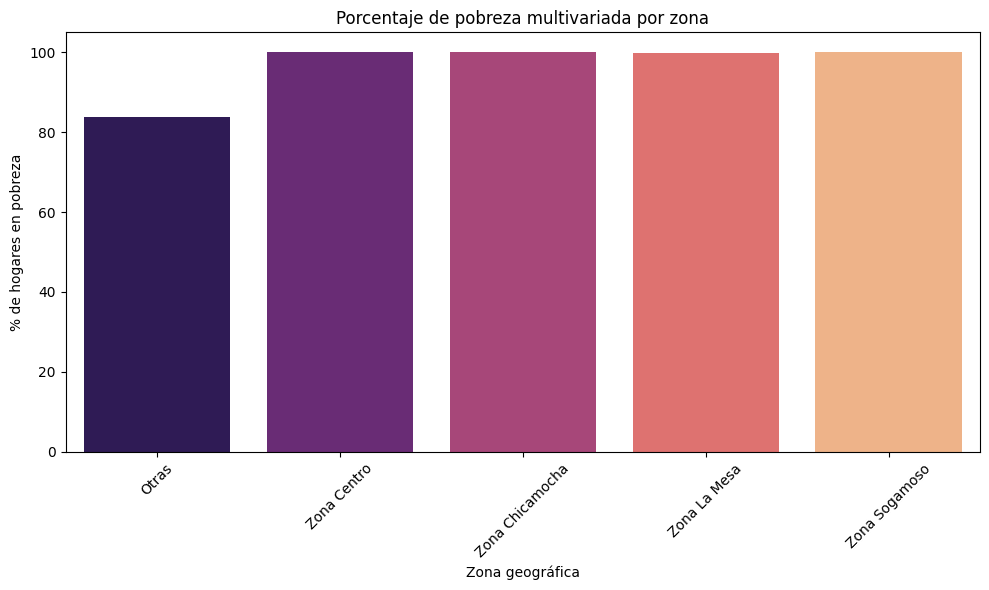

In [88]:
# Agrupar
pobreza_por_zona = df.groupby('Zona')['indicador_pobreza'].mean().reset_index()
pobreza_por_zona['Porcentaje_pobreza'] = pobreza_por_zona['indicador_pobreza'] * 100

# Visualizar
plt.figure(figsize=(10,6))
sns.barplot(data=pobreza_por_zona, x='Zona', y='Porcentaje_pobreza', palette='magma')
plt.title('Porcentaje de pobreza multivariada por zona')
plt.ylabel('% de hogares en pobreza')
plt.xlabel('Zona geográfica')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


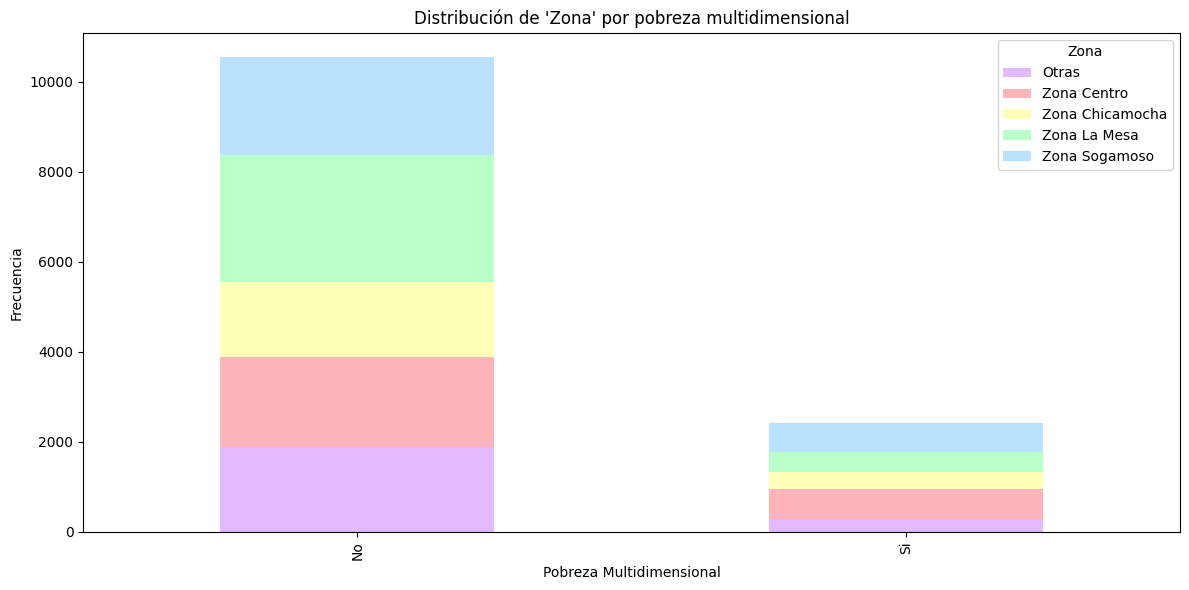

In [96]:
H5("Zona")

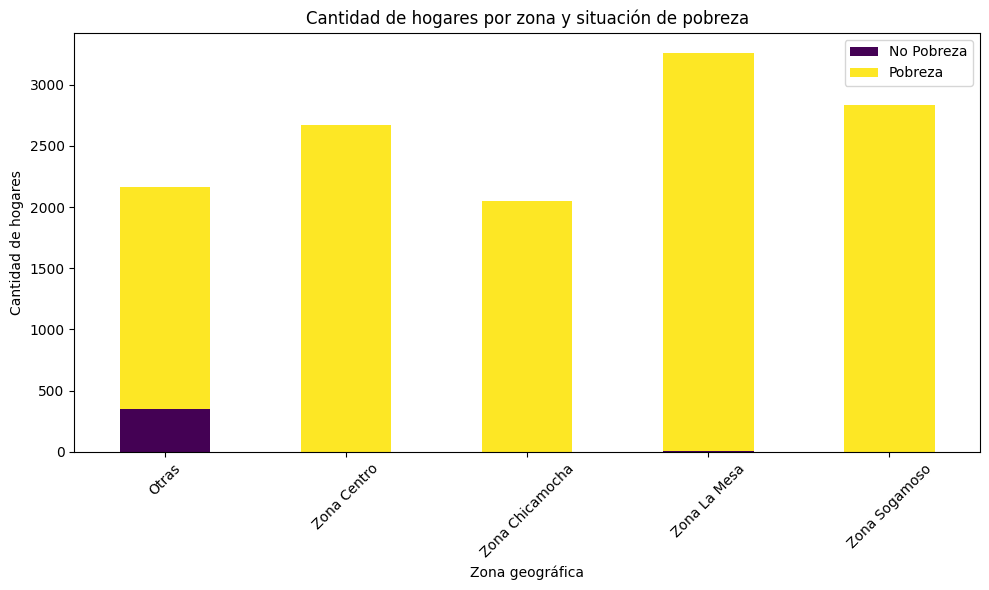

In [89]:
# Agrupar por zona y situación
conteo = df.groupby(['Zona', 'indicador_pobreza']).size().unstack(fill_value=0)
conteo.columns = ['No Pobreza', 'Pobreza']  # si las columnas están en ese orden

# Visualizar
conteo.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')
plt.title('Cantidad de hogares por zona y situación de pobreza')
plt.ylabel('Cantidad de hogares')
plt.xlabel('Zona geográfica')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-90-ed5ae360c2e7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pobreza_por_vereda, x='Vereda', y='Porcentaje_pobreza', palette='magma')


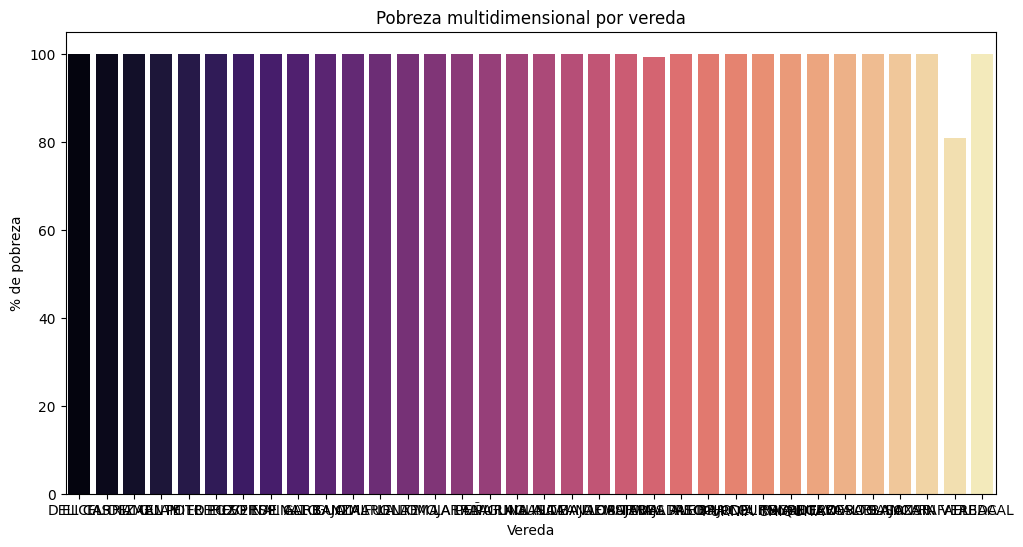

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(data=pobreza_por_vereda, x='Vereda', y='Porcentaje_pobreza', palette='magma')
plt.title('Pobreza multidimensional por vereda')
plt.ylabel('% de pobreza')
plt.show()


<ipython-input-91-54430522926c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=pobreza_por_vereda, x='Vereda', y='Porcentaje_pobreza', palette='magma')


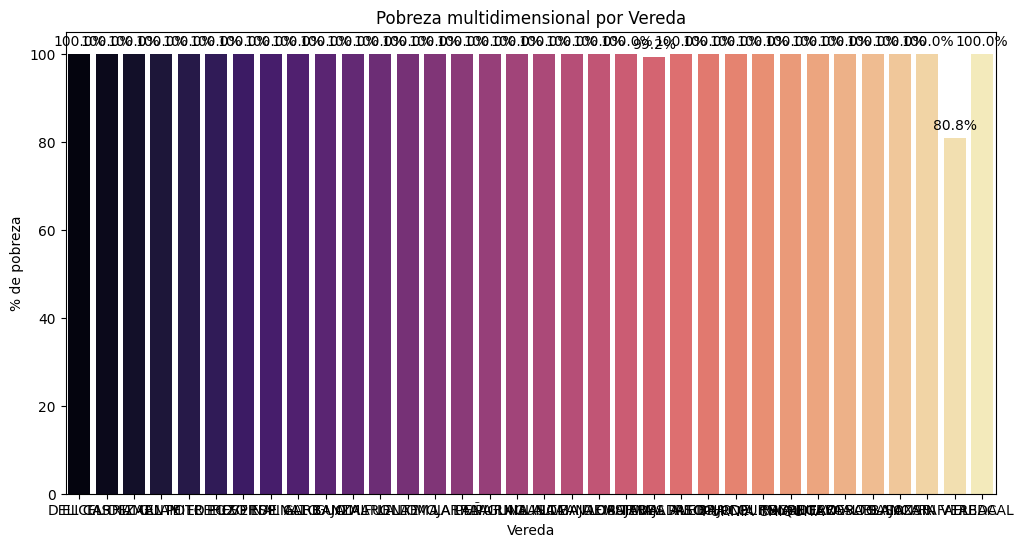

In [91]:
# Gráfica de barras por comuna
plt.figure(figsize=(12,6))
barplot = sns.barplot(data=pobreza_por_vereda, x='Vereda', y='Porcentaje_pobreza', palette='magma')
plt.title('Pobreza multidimensional por Vereda')
plt.ylabel('% de pobreza')
plt.xlabel('Vereda')

# Añadir etiquetas con los valores
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.1f}%',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.show()

<ipython-input-100-e3442c225817>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=tech_access, x='Tecnología', y='Porcentaje', palette='Blues_d')


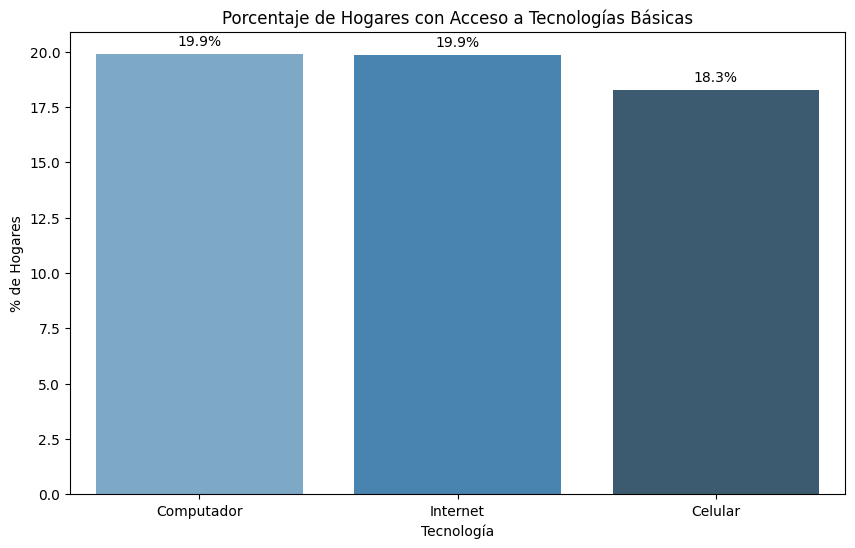

In [100]:
# Gráfico de acceso a tecnología básica
tech_vars = ['ind_tiene_pc', 'ind_tiene_internet', 'ind_gasto_celular']
tech_access = df[tech_vars].mean().reset_index()
tech_access.columns = ['Tecnología', 'Porcentaje']
tech_access['Porcentaje'] *= 10
tech_access['Tecnología'] = ['Computador', 'Internet', 'Celular']

plt.figure(figsize=(10,6))
bar = sns.barplot(data=tech_access, x='Tecnología', y='Porcentaje', palette='Blues_d')
plt.title('Porcentaje de Hogares con Acceso a Tecnologías Básicas')
plt.ylabel('% de Hogares')

# Añadir etiquetas
for p in bar.patches:
    bar.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')
plt.show()



In [102]:
def H6(feature):
  a=df[df["indicador_pobreza"]== 0][feature].value_counts()
  b=df[df["indicador_pobreza"]== 1][feature].value_counts()
  test = pd.DataFrame({
        "No pobre": a,
        "Si pobre": b,
    }).fillna(0)
  test = test.astype(int)
  ax = test.T.plot(kind="bar", stacked=True, figsize=(12, 6))
  ax.set_ylabel("Frecuencia")
  ax.set_xlabel("Pobreza")
  ax.set_title(f"Distribución de '{feature}' por pobreza")
  plt.tight_layout()
  plt.show()

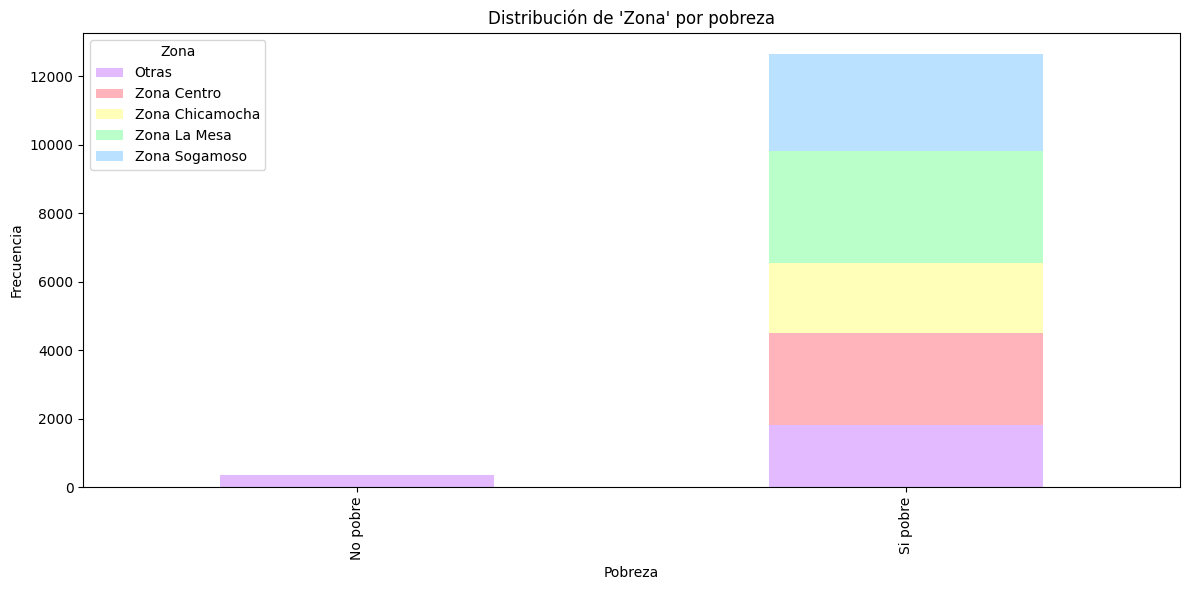

In [103]:
H6("Zona")

In [106]:
valores_unicos = df['ind_gasto_educacion'].unique()
conteo = df['ind_gasto_educacion'].value_counts()
print("Valores únicos en 'ind_gasto_educacion':")
print(valores_unicos,conteo)

Valores únicos en 'ind_gasto_educacion':
[2 1 9] ind_gasto_educacion
2    10274
1     2633
9       80
Name: count, dtype: int64


In [112]:
def H7(feature):
  a=df[df["ind_gasto_educacion"]== 1][feature].value_counts()
  b=df[df["ind_gasto_educacion"]== 2][feature].value_counts()
  C=df[df["ind_gasto_educacion"]== 9][feature].value_counts()
  test = pd.DataFrame({
        "No tiene educacion": b,
        "Si tiene educacion": a,
        "No sabe": C,
    }).fillna(0)
  test = test.astype(int)
  ax = test.T.plot(kind="bar", stacked=True, figsize=(12, 6))
  ax.set_ylabel("Frecuencia")
  ax.set_xlabel("Educación")
  ax.set_title(f"Distribución de '{feature}' por Educación")
  plt.tight_layout()
  plt.show()

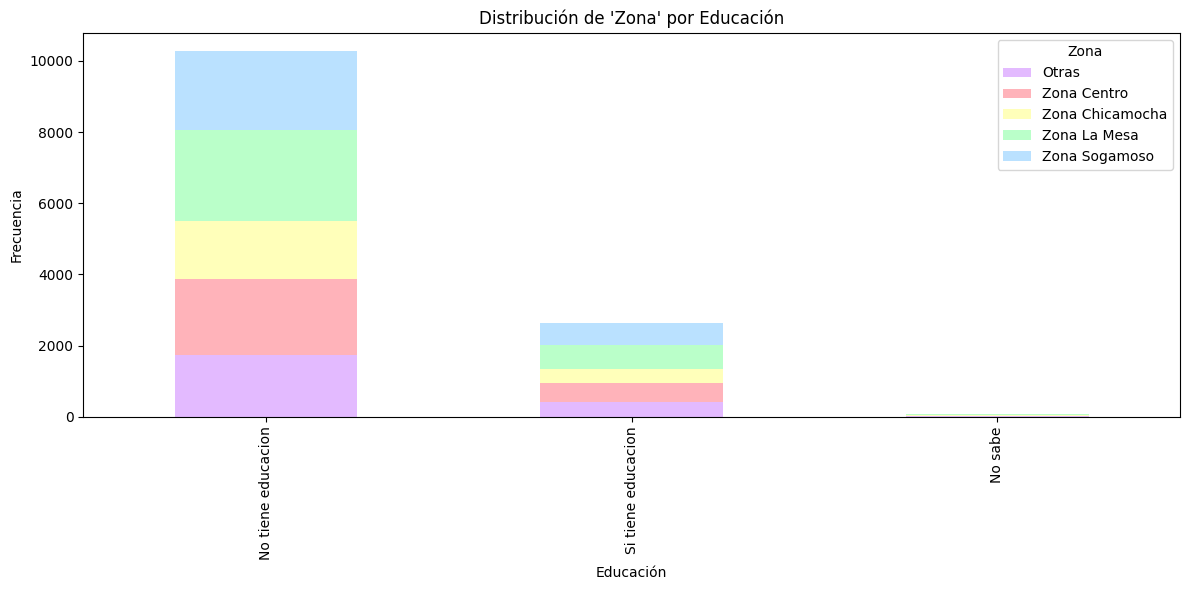

In [113]:
H7('Zona')